![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [5]:
# Load Data
import pandas as pd
men_data = pd.read_csv('men_results.csv')
women_data = pd.read_csv('women_results.csv')

In [6]:
men_data.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [7]:
men_data['tournament'].unique().tolist()

['Friendly',
 'British Home Championship',
 'Évence Coppée Trophy',
 'Copa Lipton',
 'Copa Newton',
 'Copa Premio Honor Argentino',
 'Copa Premio Honor Uruguayo',
 'Copa Roca',
 'Copa América',
 'Copa Chevallier Boutell',
 'Nordic Championship',
 'Central European International Cup',
 'Baltic Cup',
 'Balkan Cup',
 'FIFA World Cup',
 'Copa Rio Branco',
 'FIFA World Cup qualification',
 'Bolivarian Games',
 'CCCF Championship',
 'NAFC Championship',
 'Copa Oswaldo Cruz',
 'Pan American Championship',
 'Copa del Pacífico',
 "Copa Bernardo O'Higgins",
 'AFC Asian Cup qualification',
 'Atlantic Cup',
 'AFC Asian Cup',
 'African Cup of Nations',
 'Copa Paz del Chaco',
 'Merdeka Tournament',
 'UEFA Euro qualification',
 'UEFA Euro',
 'Windward Islands Tournament',
 'African Cup of Nations qualification',
 'Vietnam Independence Cup',
 'Copa Carlos Dittborn',
 'Phillip Seaga Cup',
 'CONCACAF Championship',
 'Copa Juan Pinto Durán',
 'Arab Cup',
 'South Pacific Games',
 'CONCACAF Championship qu

In [8]:
#Filter Data
men_data_worldcup = men_data[men_data['tournament'] == 'FIFA World Cup'].reset_index(drop=True)
men_data_worldcup['date'] = pd.to_datetime(men_data_worldcup['date'])
men_data_worldcup = men_data_worldcup[men_data_worldcup['date'] > '2002-01-01']

print(men_data_worldcup['date'].min())

2002-05-31 00:00:00


In [10]:
women_data_worldcup = women_data[women_data['tournament'] == 'FIFA World Cup'].reset_index(drop=True)
women_data_worldcup['date'] = pd.to_datetime(women_data_worldcup['date'])
women_data_worldcup = women_data_worldcup[women_data_worldcup['date'] > '2002-01-01']

print(women_data_worldcup['date'].min())

2003-09-20 00:00:00


In [11]:
men_data_worldcup['total_goals'] = men_data_worldcup['home_score'] + men_data_worldcup['away_score']
women_data_worldcup['total_goals'] = women_data_worldcup['home_score'] + women_data_worldcup['away_score']

men_data_worldcup.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goals
580,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
581,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
582,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
583,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
584,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [12]:
women_data_worldcup.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goals
84,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
85,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
86,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
87,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
88,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


## Choose correct Hypothesis test (sample size, normality)

In [146]:
men_data_worldcup.shape

(384, 8)

In [147]:
women_data_worldcup.shape

(200, 8)

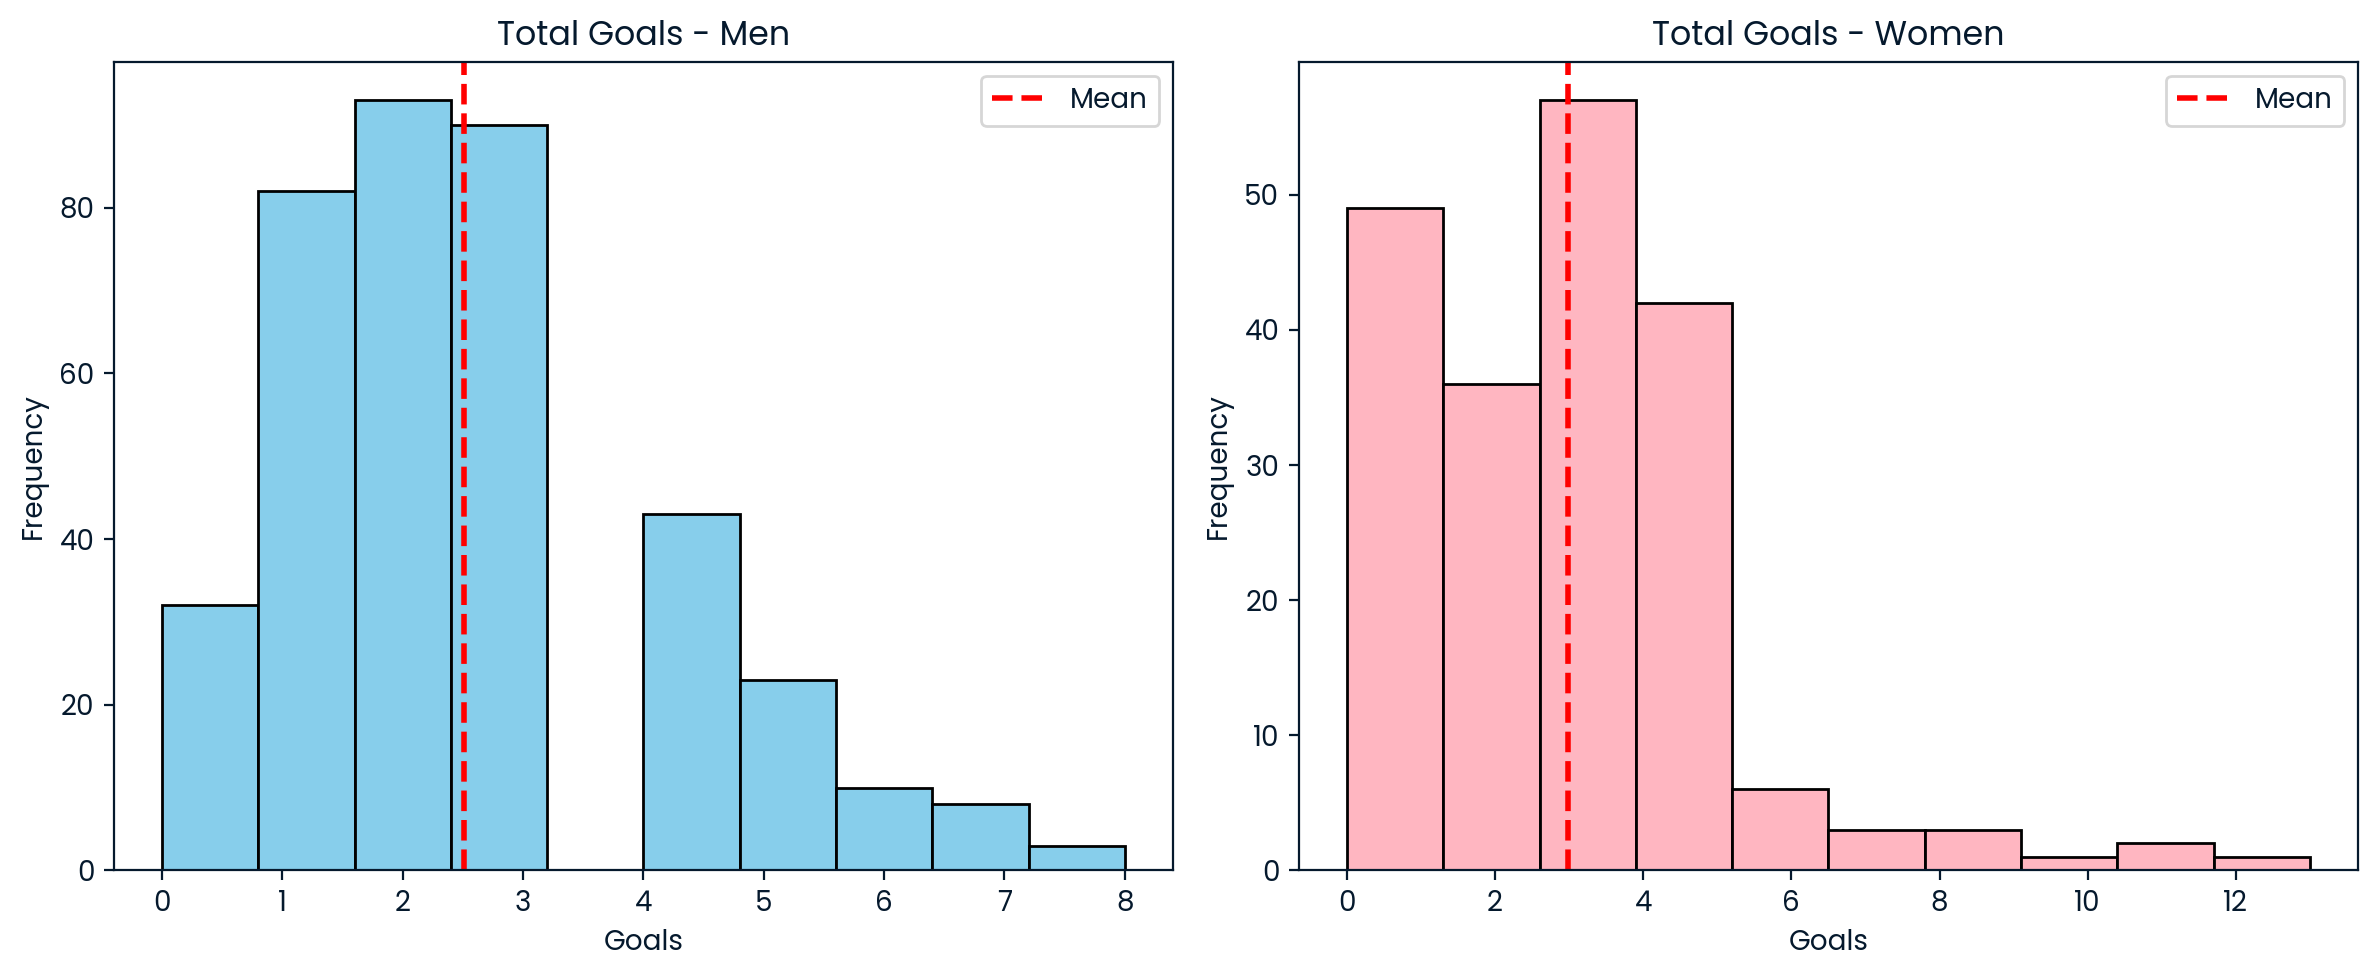

2.5130208333333335
2.98


In [148]:
# Determine normality using histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Men
plt.subplot(1, 2, 1)
plt.hist(men_data_worldcup['total_goals'], bins=10, edgecolor='black', color='skyblue')
plt.axvline(men_data_worldcup['total_goals'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Total Goals - Men')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()

# Women
plt.subplot(1, 2, 2)
plt.hist(women_data_worldcup['total_goals'], bins=10, edgecolor='black', color='lightpink')
plt.axvline(women_data_worldcup['total_goals'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Total Goals - Women')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

print(men_data_worldcup['total_goals'].mean())
print(women_data_worldcup['total_goals'].mean())


Right skewed data -> Common with goals scored.

- Large sample sizes → t-test is robust to moderate deviations from normality
- Comparing means
- Slight skew is not a problem with n > 30 per group

Could use t-test unpaired, I will test more for normality using Shapiro-wilk test.

In [150]:
from scipy.stats import shapiro

# Men
stat, p = shapiro(men_data_worldcup['total_goals'])
print('Men: Statistics=%.3f, p=%.3f' % (stat, p))

# Women
stat, p = shapiro(women_data_worldcup['total_goals'])
print('Women: Statistics=%.3f, p=%.3f' % (stat, p))


Men: Statistics=0.927, p=0.000
Women: Statistics=0.849, p=0.000


### Shapiro–Wilk test
Works well for small to medium sample sizes (n < ~5000) → Gives a p-value

Ho: data is normally distributed

- p > 0.05 → fail to reject → roughly normal
- p ≤ 0.05 → reject → not normal

In this case p-value < 0.05 for both → data is not normal.
- t-test assumptions (normality of each group) are technically violated
- Sample sizes are large (men=384, women=200)
- Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups, which doesn't assume normality

In [17]:
import pingouin as pg
# Significance level
alpha = 0.10

# Wilcoxon-Mann–Whitney U test
mw_test = pg.mwu(x=women_data_worldcup['total_goals'],
                 y=men_data_worldcup['total_goals'],
                 alternative='greater')

# print(mw_test)
p_value_mw = mw_test['p-val'][0]
print("Mann-Whitney p-value:", p_value_mw)

Mann-Whitney p-value: 0.005106609825443641


In [22]:
#Difference in means
Men_mean = men_data_worldcup['total_goals'].mean()
Woemn_mean = women_data_worldcup['total_goals'].mean()
difference = Woemn_mean - Men_mean
print(difference)

0.4669791666666665


In [23]:
#Confience interval
ci_test = pg.ttest(x=women_data_worldcup['total_goals'],
                   y=men_data_worldcup['total_goals'],
                   paired=False,
                   alternative='two-sided')   # CI must be two-sided

ci_low = ci_test['CI95%'][0][0]
ci_high = ci_test['CI95%'][0][1]

print(ci_low, ci_high)

0.14 0.79


### Results:

1) Based on Mann–Whitney test (p < 0.10), we are 90% confident that women’s international soccer matches score significantly more goals than men’s.

2) On average, women’s matches have 0.45 more goals per game.

3) A 95% confidence interval for this difference ranges from 0.14 to 0.79 goals, meaning we are 95% confident that women’s matches consistently produce more scoring